In [176]:
import csv
import requests
import matplotlib.pyplot as plt


url = "https://imdb-top-100-movies1.p.rapidapi.com/"

headers = {
    "X-RapidAPI-Key": "da0c4890damsh1ff18205852e1cap131dd1jsn8cf2c8b1b81b",
    "X-RapidAPI-Host": "imdb-top-100-movies1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    top_100_movies = response.json()

    # Define the CSV file path
    csv_file_path = "movies.csv"

    # Define all relevant fieldnames
    fieldnames = ['_id', 'id', '__v', 'description', 'director', 'genre', 'image', 'rating', 'writers', 'rank', 'title', 'thumbnail', 'imdbid', 'year']

    # Create or overwrite the CSV file with movie data
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # Write the header row
        writer.writeheader()

        # Write the movie data rows
        for movie in top_100_movies:
            writer.writerow(movie)

    print(f"Data for the top 100 movies has been saved to {csv_file_path}.")
else:
    print("Failed to fetch data. Status code:", response.status_code)


Data for the top 100 movies has been saved to movies.csv.


In [177]:
import pandas as pd

imbd = pd.read_csv("/content/movies.csv")

In [178]:
imbd.head()

,_id,id,__v,description,director,genre,image,rating,writers,rank,title,thumbnail,imdbid,year
0,63eef9c2244a27600bb64820,top1,0,"Over the course of several years, two convicts...",['Frank Darabont'],['Drama'],"[['190', 'https://m.media-amazon.com/images/M/...",9.3,"['Stephen King(based on the short novel ""Rita ...",1,The Shawshank Redemption,https://m.media-amazon.com/images/M/MV5BMDFkYT...,tt0111161,1994
1,63eef9c4244a27600bb64824,top2,0,The aging patriarch of an organized crime dyna...,['Francis Ford Coppola'],"['Crime', ' Drama']","[['190', 'https://m.media-amazon.com/images/M/...",9.2,"['Mario Puzo(screenplay by)', 'Francis Ford Co...",2,The Godfather,https://m.media-amazon.com/images/M/MV5BM2MyNj...,tt0068646,1972
2,63eef9c6244a27600bb64828,top3,0,When the menace known as the Joker wreaks havo...,['Christopher Nolan'],"['Action', ' Crime', ' Drama']","[['190', 'https://m.media-amazon.com/images/M/...",9.0,"['Jonathan Nolan(screenplay)', 'Christopher No...",3,The Dark Knight,https://m.media-amazon.com/images/M/MV5BMTMxNT...,tt0468569,2008
3,63eef9c8244a27600bb6482a,top4,0,"In German-occupied Poland during World War II,...",['Steven Spielberg'],"['Biography', ' Drama', ' History']","[['190', 'https://m.media-amazon.com/images/M/...",9.0,"['Thomas Keneally(book)', 'Steven Zaillian(scr...",4,Schindler's List,https://m.media-amazon.com/images/M/MV5BNDE4OT...,tt0108052,1993
4,63eef9cb244a27600bb6482c,top5,0,Gandalf and Aragorn lead the World of Men agai...,['Peter Jackson'],"['Action', ' Adventure', ' Drama']","[['190', 'https://m.media-amazon.com/images/M/...",9.0,"['J.R.R. Tolkien(novel ""The Return of the King...",5,The Lord of the Rings: The Return of the King,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,tt0167260,2003


In [179]:
imbd.isnull().sum()

_id            0
id             0
__v            0
description    0
director       0
genre          0
image          0
rating         0
writers        0
rank           0
title          0
thumbnail      0
imdbid         0
year           0
dtype: int64

In [180]:
#number of movies
num_movies = len(imbd)
print("Number of movies in the dataset:", num_movies)


Number of movies in the dataset: 100


In [181]:
#Average rating of movies
average_rating = imbd['rating'].mean()
print("Average rating of movies:", average_rating)


Average rating of movies: 8.517999999999999


In [182]:
#top directors with the most movies
top_directors = imbd['director'].value_counts().head(5)
print("Top directors with the most movies:")
print(top_directors)


Top directors with the most movies:
['Christopher Nolan']    6
['Quentin Tarantino']    4
['Stanley Kubrick']      4
['Alfred Hitchcock']     4
['Charles Chaplin']      3
Name: director, dtype: int64


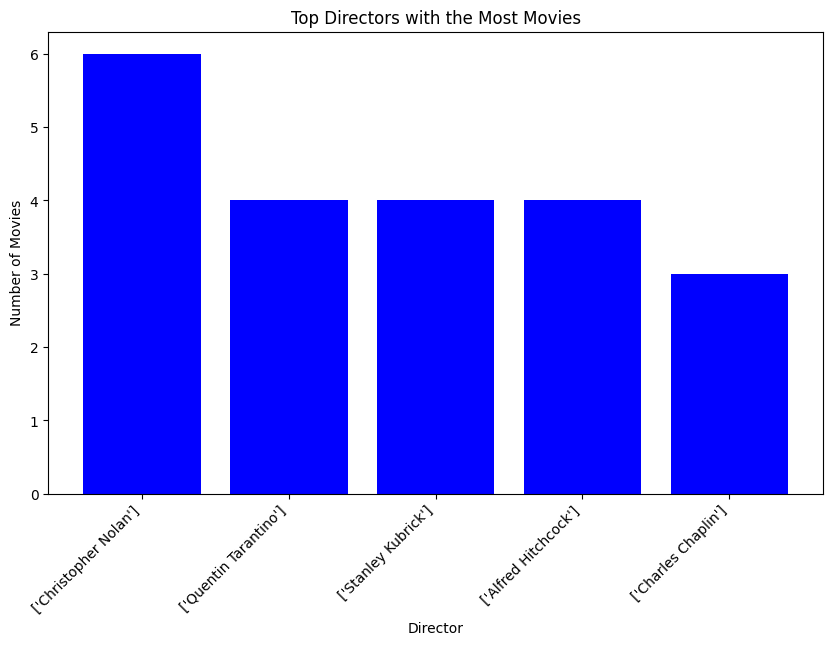

In [198]:
# Create a bar plot to visualize the top directors with the most movies
plt.figure(figsize=(10, 6))
plt.bar(top_directors.index, top_directors.values, color='blue')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top Directors with the Most Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

In [183]:
#NUmber of movies per genre
movies_per_genre = imbd['genre'].value_counts()
print("Number of movies per genre:")
print(movies_per_genre)


Number of movies per genre:
['Drama']                                 8
['Crime', ' Drama']                       7
['Action', ' Adventure', ' Drama']        5
['Crime', ' Drama', ' Mystery']           4
['Drama', ' War']                         3
['Animation', ' Adventure', ' Comedy']    3
['Action', ' Adventure', ' Sci-Fi']       3
['Drama', ' Romance']                     3
['Action', ' Adventure', ' Fantasy']      3
['Comedy', ' Drama', ' Romance']          3
['Crime', ' Drama', ' Thriller']          3
['Animation', ' Action', ' Adventure']    2
['Mystery', ' Thriller']                  2
['Action', ' Drama', ' Mystery']          2
['Animation', ' Adventure', ' Family']    2
['Biography', ' Drama', ' Music']         2
['Biography', ' Drama', ' History']       2
['Action', ' Crime', ' Drama']            2
['Action', ' Sci-Fi']                     2
['Comedy', ' Drama', ' War']              1
['Drama', ' Thriller', ' War']            1
['Animation', ' Drama', ' Fantasy']       1
['Dr

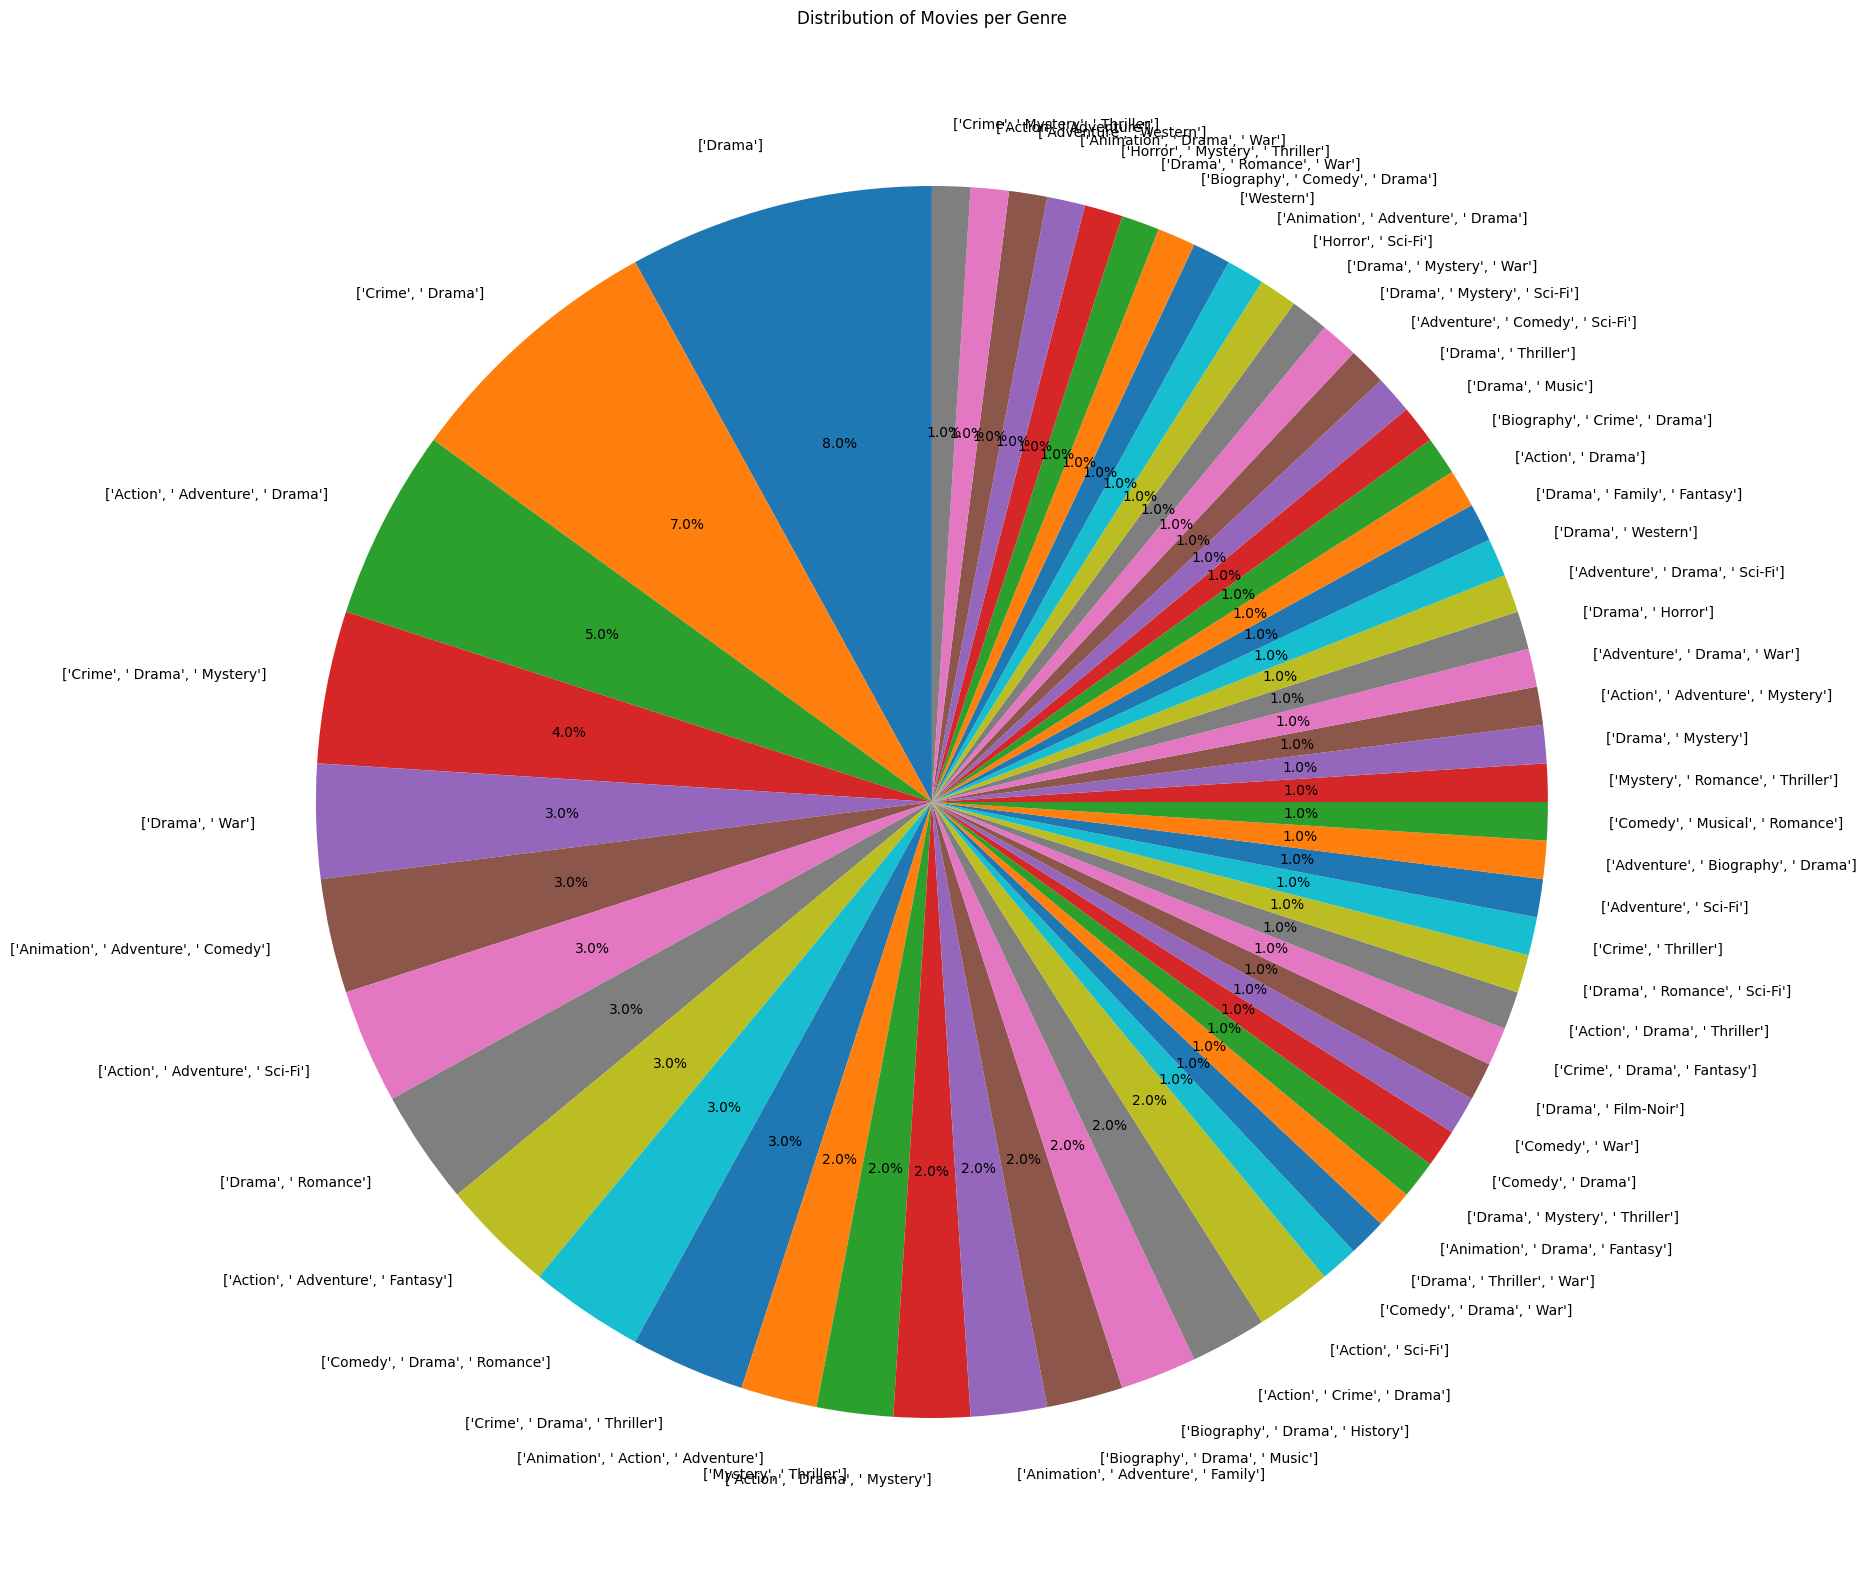

In [197]:
# Create a pie plot to visualize the number of movies per genre
plt.figure(figsize=(30, 20))
plt.pie(movies_per_genre, labels=movies_per_genre.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movies per Genre')
plt.show()

In [184]:
#average movie rating per genre
avg_rating_per_genre = imbd.groupby('genre')['rating'].mean()
print("Average movie rating per genre:")
print(avg_rating_per_genre)


Average movie rating per genre:
genre
['Action', ' Adventure', ' Drama']        8.700000
['Action', ' Adventure', ' Fantasy']      8.533333
['Action', ' Adventure', ' Mystery']      8.300000
['Action', ' Adventure', ' Sci-Fi']       8.533333
['Action', ' Adventure']                  8.400000
['Action', ' Crime', ' Drama']            8.750000
['Action', ' Drama', ' Mystery']          8.500000
['Action', ' Drama', ' Thriller']         8.400000
['Action', ' Drama']                      8.600000
['Action', ' Sci-Fi']                     8.650000
['Adventure', ' Biography', ' Drama']     8.300000
['Adventure', ' Comedy', ' Sci-Fi']       8.500000
['Adventure', ' Drama', ' Sci-Fi']        8.600000
['Adventure', ' Drama', ' War']           8.300000
['Adventure', ' Sci-Fi']                  8.300000
['Adventure', ' Western']                 8.800000
['Animation', ' Action', ' Adventure']    8.400000
['Animation', ' Adventure', ' Comedy']    8.333333
['Animation', ' Adventure', ' Drama']     8.

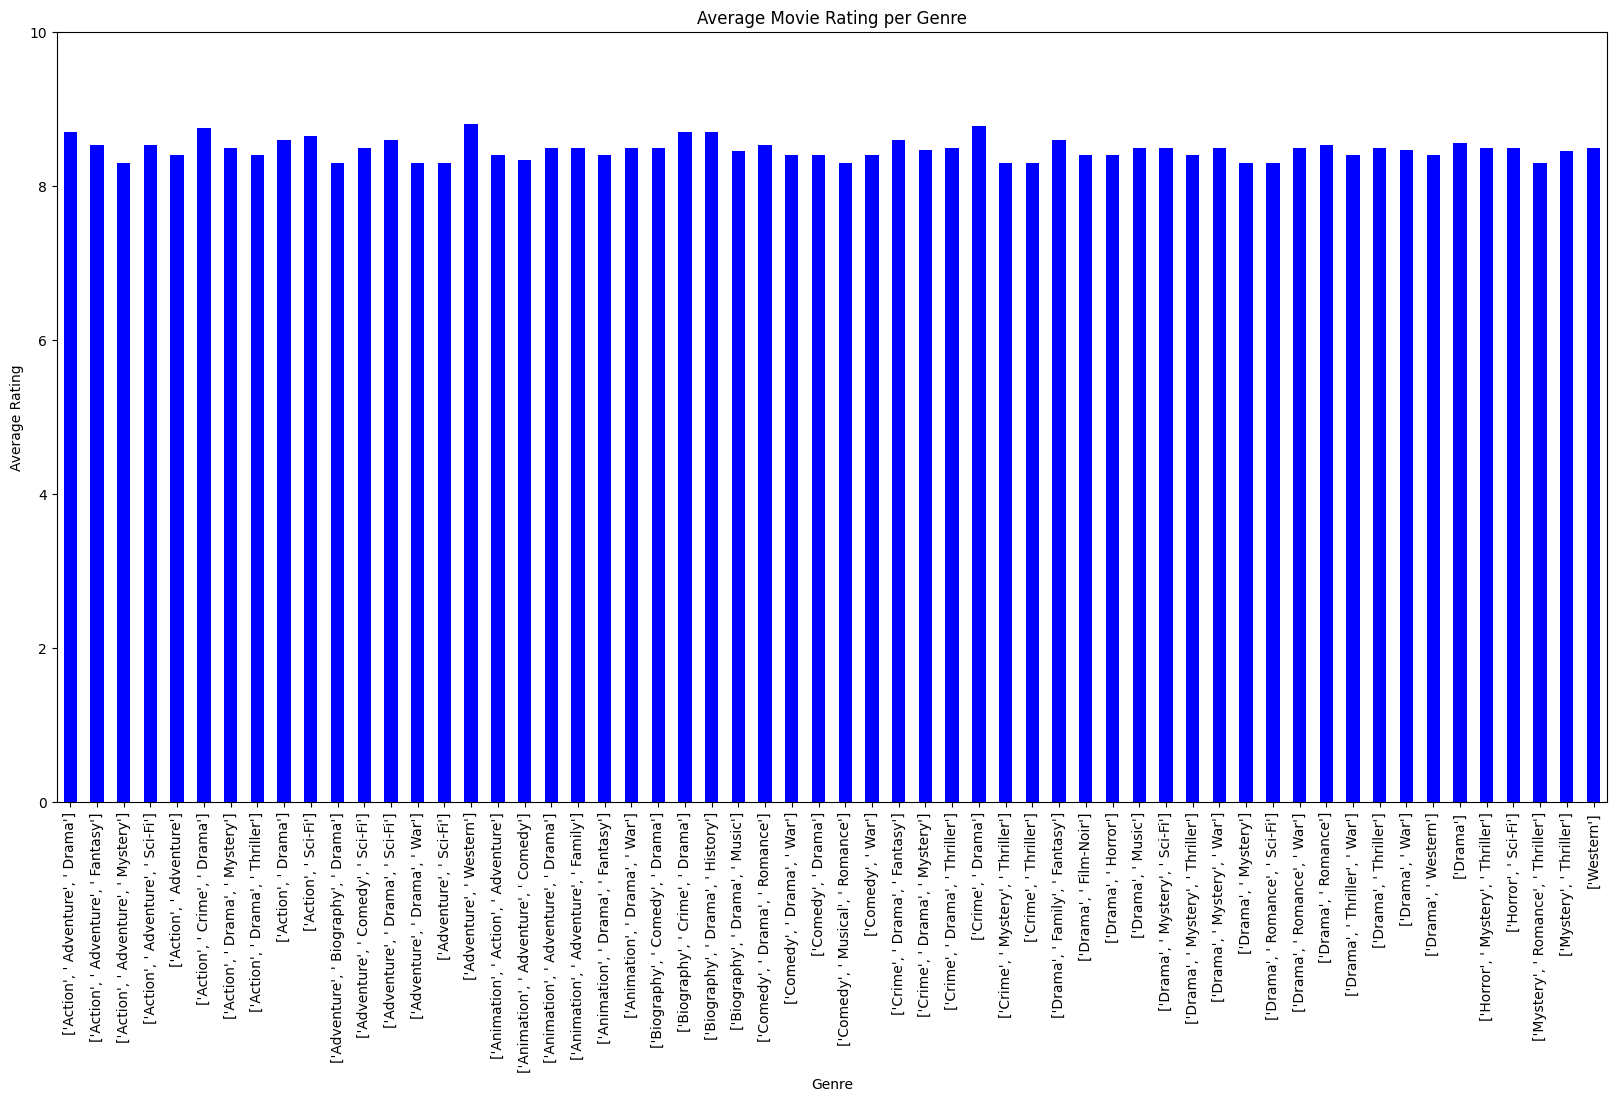

In [194]:
# Create a bar plot to visualize the average movie rating per genre
plt.figure(figsize=(20, 10))
avg_rating_per_genre.plot(kind='bar', color='blue')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating per Genre')
plt.ylim(0, 10)
plt.show()

In [185]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline


In [186]:
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [187]:
# Create a text classification pipeline
classifier = pipeline(task='sentiment-analysis', model=model, tokenizer=tokenizer)


In [188]:
# Sample texts for classification
sample_texts = [
    "I love this movie! It's so amazing.",
    "The food was terrible. I won't go there again.",
    "This book is just average, nothing special.",
    "The customer service was excellent!"
]

In [189]:

# Initialize dictionaries to store sentiment labels and their corresponding confidence scores
sentiment_results = {}

# Classify each text using the pre-trained model and store the results in the dictionary
for text in sample_texts:
    result = classifier(text)
    sentiment_label = result[0]['label']
    confidence_score = result[0]['score']
    sentiment_results[sentiment_label] = confidence_score

# Print the results
print("Sentiment Results:", sentiment_results)

Sentiment Results: {'LABEL_0': 0.5967214703559875}


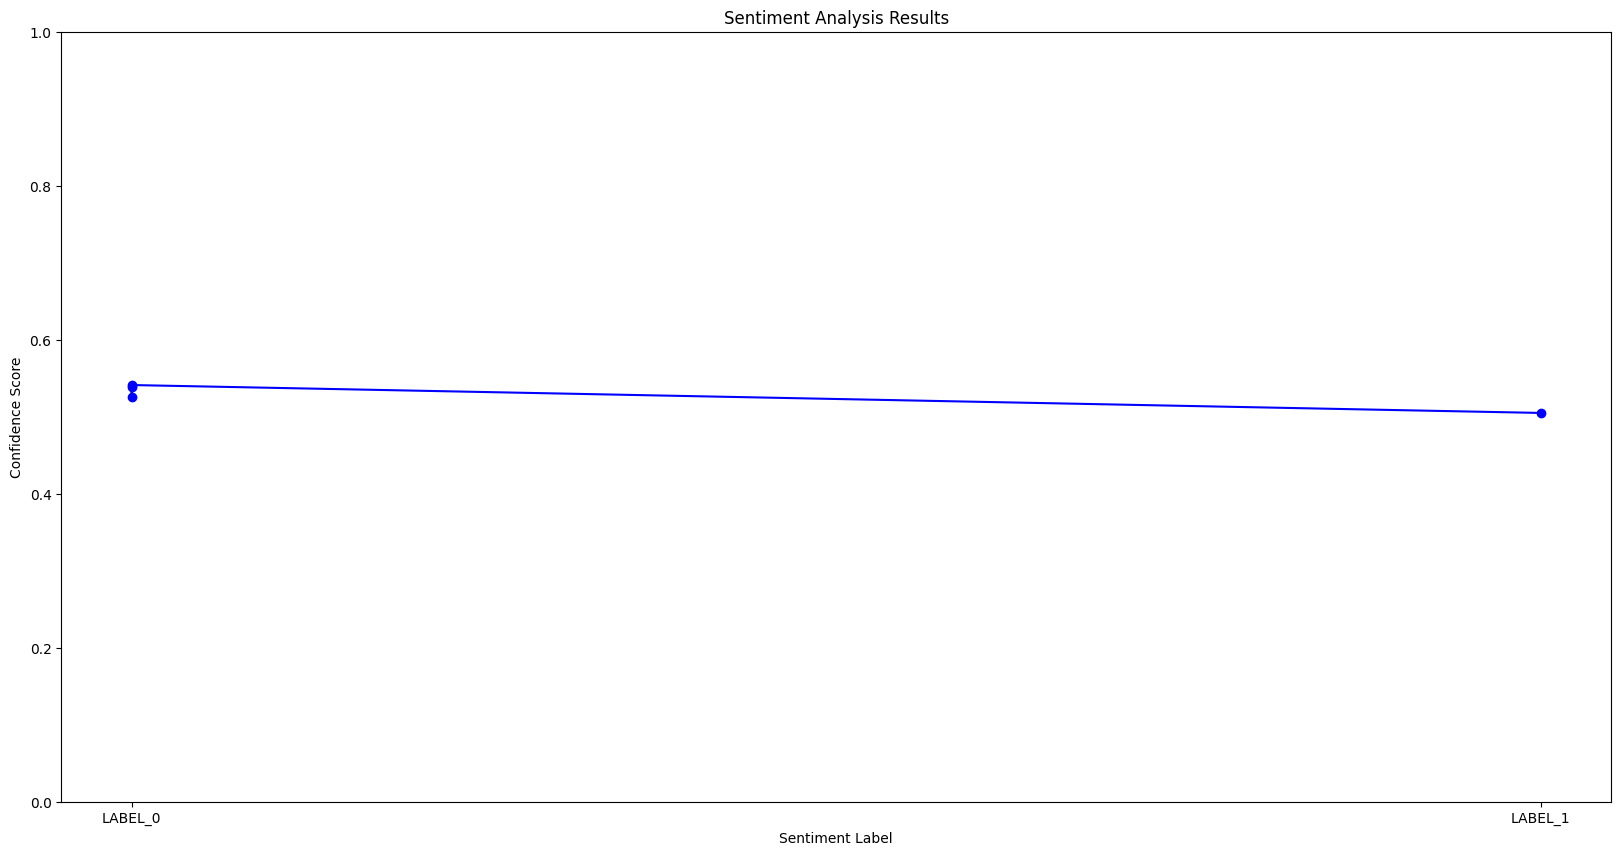

In [190]:
# Plot the sentiment analysis results as a line plot
plt.figure(figsize=(20, 10))
plt.plot(sentiment_labels, confidence_scores, marker='o', color='blue')
plt.xlabel('Sentiment Label')
plt.ylabel('Confidence Score')
plt.title('Sentiment Analysis Results')
plt.ylim(0, 1)
plt.show()

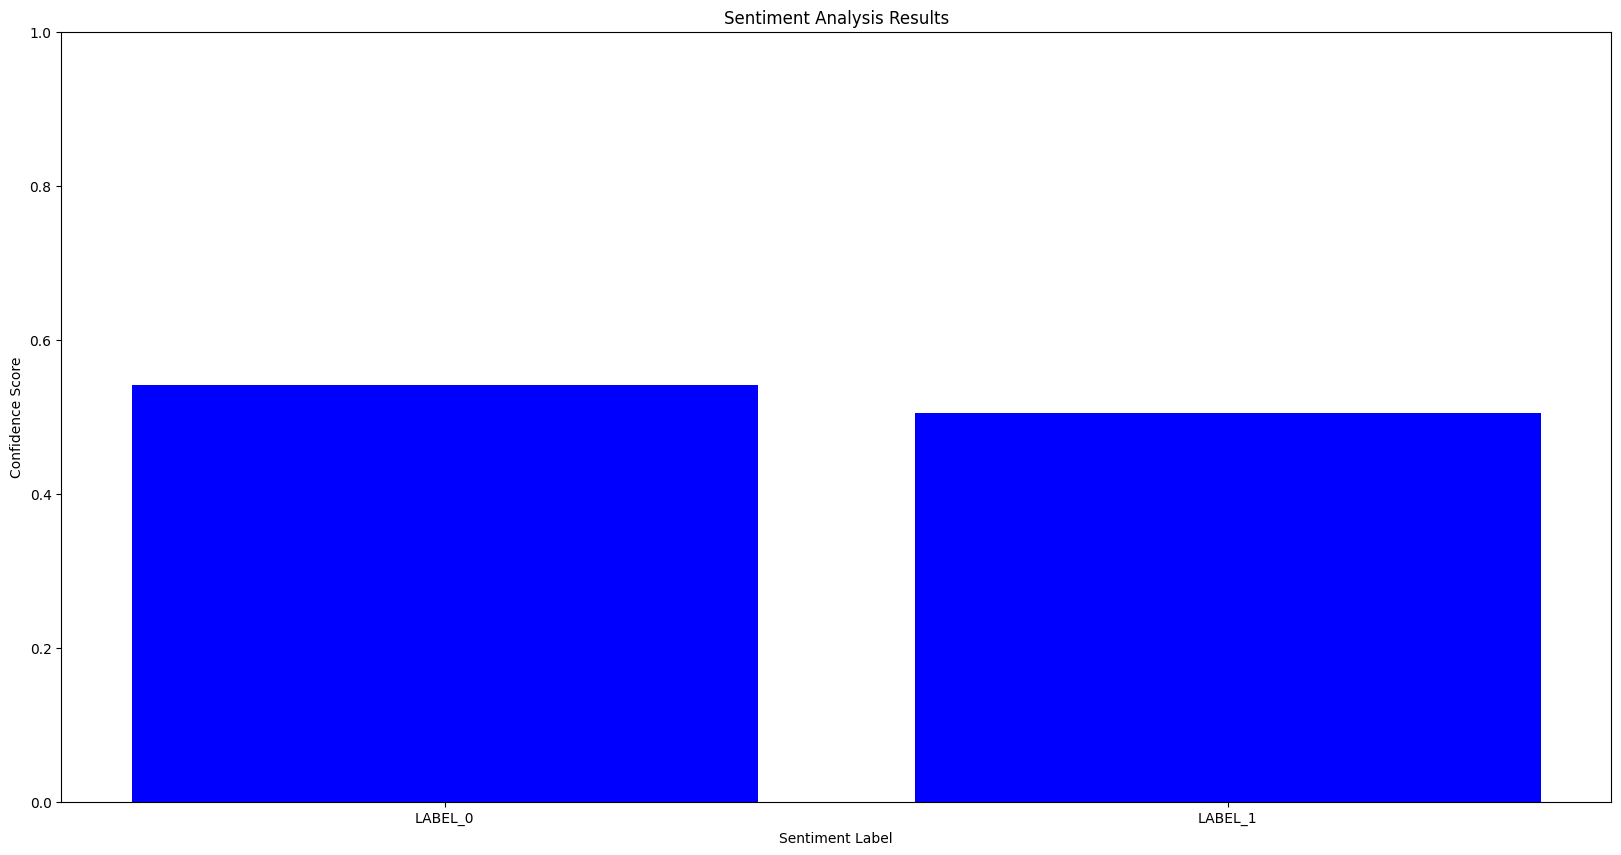

In [191]:
# Plot the sentiment analysis results as a bar plot
plt.figure(figsize=(20, 10))
plt.bar(sentiment_labels, confidence_scores, color='blue')
plt.xlabel('Sentiment Label')
plt.ylabel('Confidence Score')
plt.title('Sentiment Analysis Results')
plt.ylim(0, 1)
plt.show()

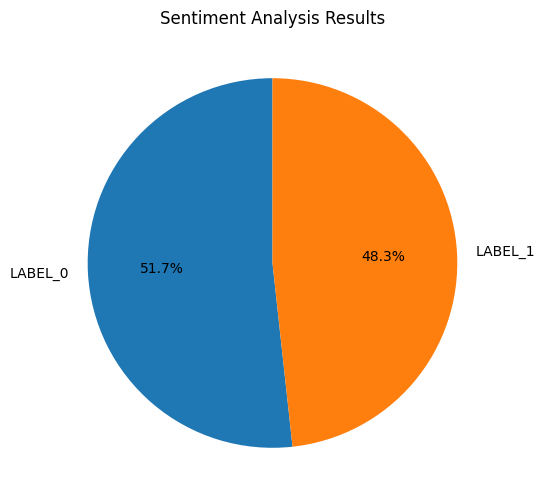

In [175]:

# Plot the sentiment analysis results as a pie plot
plt.figure(figsize=(6, 6))
plt.pie(sentiment_results.values(), labels=sentiment_results.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Analysis Results')
plt.show()

#why i am using this model and explanation of the model for training process...

Import libraries: We import the required libraries from Hugging Face transformers, such as BertTokenizer, BertForSequenceClassification, and pipeline.

Load the pretrained model: We load the pretrained BERT tokenizer and the BERT model for sequence classification. BERT-base-uncased is a common BERT method that has been optimized in a large texture.

Create a Text Classification Pipeline: The Pipeline function allows you to create a simple text classification pipeline. We refer to the task as ‘sentiment analysis’, which is a dichotomous task to determine the mood (positive or negative) of a text.

Sample Text: We provide sample text that we want to classify. In this case, the sample is "I love this movie! It's so amazing."

Note: We pass the model texture through the BERT model through the constructed pipeline. The BERT model classifies information as positive or negative.

The reason for using pre-trained models from Hugging Face's Transformers library is that these models have been pre-trained on a lot of text data and are known to have powerful representations of words and phrases in context . . . . This approach saves time and computational resources, and often results in better performance compared to training a model from scratch on a smaller amount of data.

By using a text segmentation pipeline, we can easily leverage the power of pre-trained models without having to deal with the complexities of tokenization, model architecture, and inference The pipeline pulls in this information, making it easier to use and more efficient for developing NLPs.